# Saga
Saga is a design pattern that manages data consistency across multiple services without the use of distributed transactions. It ensures system consistency be executing a series of operations in a sequence and compensating for any failures by reversing previous actions.

- **Saga**: A series of operations that must be executed in a specific order.
- **Compensation Steps**: Actions taken to reverse the effects of previous steps if an error occurs.
- **No Distributed Transactions**: Does not use traditional ACID transactions across multiple services.

## What is a Saga?
A Saga is a sequence of local transactions where each transaction updates data within a single service. After each local transaction completes, it triggers the next transaction throught messaging or events. If one transaction fails, the Saga executes compensating transaction to undo the effects of the preceding transactions, maintaining the system's consistency.

Types of Sagas

## Choreography-Based Sagas
Each service performs its transaction and then publish an event to trigger the next step.

Flow: Decentralized, each service away only the next step

User Case: Suitable for simple workflows with a clear progression.

Pros:
- Simplicity in small systems.
- No central coordinator required.

Cons:
- Difficult to manage as complexity grows.
- Harder to track and debug.

## Orchestration-Based Sagas
A central Saga orchestrator manages the sequences of transactions.

Flow: Centralize control over the entire Saga execution.

Use Case: Preferred for complex workflows requiring coordination.

Pros:
- Clear visibility of the process flow.
- Easier to handle complex logic and compensations.

Cons:
- Single point of control, which could become a bottleneck.
- Increase complexity in the orchestrator.

## Example of How Sagas Work
Placing an online order that involves multiple services (Order Service, Payment Service, Inventory Service, Shipping Service).
1. Order Service: Creates an order and initiates the Saga.
2. Payment Services: Processes payment.
- - If payment fails, compensatubg transaction: Cancel the order.
3. Inventory Service: Reserves Items.
- - If reservation fails, compensating transaction: Refund payment, cancel the order.
4. Shipping Service: Schedules delivery.
- - If scheduling fails, compensating transaction: Release inventory, refund payment, cancel the order.
 
Each step commits locally, and failures trigger compensating actions to rollback previous steps.

## Compensating Transactions
Undo the effects of a previous transaction in the Saga.

Charateristics:
- Must be explicitly defined for each transaction that can be compensated.
- Should be idempotent and handle partial failures gracefully.

Design Considerations:
- Not all operations are easily reversible (eg., sneding an email).
- Side effects may require additional handling.

## Checkpoints
When a Saga is redriven after a failure, it utilizes checkpoints to resume execution from the point of failure rather from starting over from the beginning. 

## Distributed Saga
A distributed sata is a pattern used in microservices architecture to manage transactions thqat span multiple services to represend a single business level action. It involves executing a sequence of operations across different services and compensating for failures by reversing previous actions.

A distributed saga can be implemented using a Directed Acyclic Graph (DAG). A DAG is a graph with directed edges, meaning there's a specific order to follow, and no cycles exist, ensuring that each task has a clear sequence of execution.

When implementing a distributed saga using a DAG
1. Nodes in the DAG: Each node represends an operation within the saga.
2. Edges: Directed edges represent dependences between operations (eg., one service must complete its operation before another starts).
3. Compensation Eges: Additional edges representing compensating transactions that reverse the effect of previous operations if a failure occurs.

Example of a distributed saga implemented by a DAG.

In [ ]:
!pip install networkx matplotlib

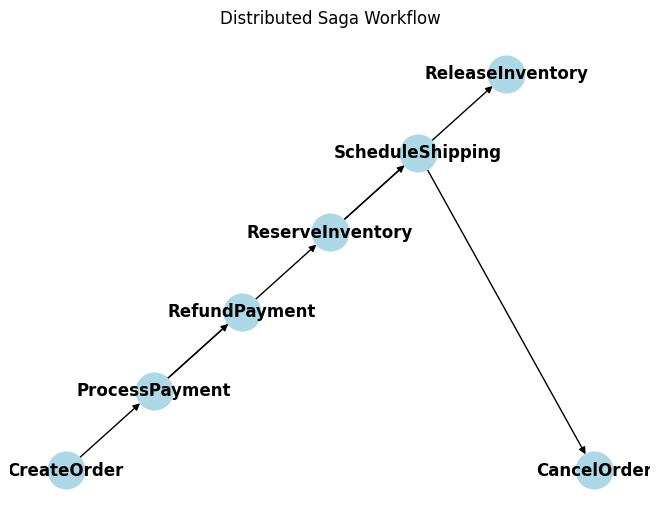

Executing CreateOrder
Executing ProcessPayment
Executing ReserveInventory
Executing RefundPayment
Executing ScheduleShipping
Executing ReleaseInventory
Executing CancelOrder


In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed acyclic graph (DAG)
saga_dag = nx.DiGraph()

# Add nodes representing the operations in the saga
saga_dag.add_node("CreateOrder")
saga_dag.add_node("ProcessPayment")
saga_dag.add_node("ReserveInventory")
saga_dag.add_node("ScheduleShipping")

# Define dependencies between the operations
saga_dag.add_edge("CreateOrder", "ProcessPayment")
saga_dag.add_edge("ProcessPayment", "ReserveInventory")
saga_dag.add_edge("ReserveInventory", "ScheduleShipping")

# Add compensating transactions for each operation
saga_dag.add_node("CancelOrder")
saga_dag.add_node("RefundPayment")
saga_dag.add_node("ReleaseInventory")

# Define the order of compensation transactions
saga_dag.add_edge("ProcessPayment", "RefundPayment")
saga_dag.add_edge("ReserveInventory", "ReleaseInventory")
saga_dag.add_edge("ScheduleShipping", "CancelOrder")

# Improved positioning for better visualization
pos = {
    "CreateOrder": (1, 2),
    "ProcessPayment": (3, 4),
    "RefundPayment": (5, 6),
    "ReserveInventory": (7, 8),
    "ScheduleShipping": (9, 10),
    "ReleaseInventory": (11, 12),
    "CancelOrder": (13, 2)
}

nx.draw(saga_dag, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Distributed Saga Workflow")
plt.axis('off')
plt.show()

# Function to execute the saga
def execute_saga(dag):
    for node in nx.topological_sort(dag):
        if "Compensate" not in node:
            print(f"Executing {node}")
        else:
            print(f"Compensating {node}")

# Execute the saga
execute_saga(saga_dag)

Explanation
- Nodes: Represents each step in the saga (eg., `CreateOrder`, `ProcessPayment`).
- Edges: Define dependencies between nodes, ensuring they are executed in order.
- Compensation Nodes: Additional nodes for compensating transactions (eg., `RefundPayment`, `Releaseinventory`).

### Saga Execution Coordinator
To orchestrate and manage these complex transactions, a component knonw as the Saga Execution Coordinator (SEC) is employed.

The Saga Execution Coordinator is a logical component responsible for coordinate the execution of the individual steps (local transactions) in a distributed saga. It ensures that all the participating services execute their respective operations in the coorect order and handle compensations if any step fails.